In [123]:
# exercise 10_1_5
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import k_means
import pandas as pd

In [124]:
data = pd.read_csv('data.csv')
prices = data[['date','price_GER']]

In [125]:
# create a df with one column for each hour and one row for each day
prices_copy = prices.copy()
prices_copy['hour'] = prices_copy['date'].str.extract('(\d+):').astype(int)
prices_copy['day'] = prices_copy['date'].str.extract('(\d+-\d+-\d+)')
prices_tab = prices_copy.pivot(index='day',columns='hour', values='price_GER')
# drop the rows with missing values
prices_tab = prices_tab.dropna()
# Make sure that each rows has a mean of 0 and a standard deviation of 1
prices_tab = prices_tab.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
#prices_tab = prices_tab.T
prices_tab.reset_index(drop=True, inplace=True)
#prices_tab.drop(prices_tab.columns[0], axis=1, inplace=True)
prices_df = pd.DataFrame(prices_tab, index=prices_tab.index, columns=prices_tab.columns)
prices_df

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,2.835846,1.249126,0.018874,-0.488007,-0.270648,-0.717538,-1.126173,-0.936636,-0.055028,-0.176749,...,0.373604,0.370995,0.544883,1.161313,0.379690,-0.058506,-0.233262,-1.793900,-0.049811,-2.141674
1,-1.418533,-1.713030,-1.769545,-1.690853,-1.784806,-1.331257,-0.618265,0.274526,0.528008,0.591915,...,0.565684,0.661783,0.717583,0.739998,0.862328,0.863043,0.764798,0.708760,0.696598,0.592392
2,-1.550323,-1.308449,-1.265519,-1.436192,-1.448757,-1.235154,-0.695911,-0.517909,0.541730,0.242267,...,0.787792,1.051654,1.119714,1.239081,1.001395,1.229657,1.116573,0.419222,-0.418437,-0.810042
3,0.154060,-0.526058,-0.533573,-0.557997,-0.546724,-0.563633,-0.060121,1.016418,1.102842,1.053994,...,0.281817,0.334422,0.503512,0.892419,0.787208,0.371998,-0.625633,-0.841692,-1.117872,-3.475738
4,-1.067491,-1.191839,-1.261697,-1.407002,-1.663381,-1.403509,-1.315488,-0.937555,-0.387771,-0.120214,...,0.680360,0.771176,1.008694,1.029651,1.359382,1.205694,0.738343,0.678963,0.642637,0.543438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,-0.480957,-0.685443,-0.881562,-0.877480,-0.816869,-0.878705,-0.802890,-0.410550,-0.539323,-0.558302,...,-0.665749,-0.359632,1.121872,1.410030,1.422989,1.420030,1.426255,1.418092,1.416459,1.317583
1777,-1.330084,-1.330324,-1.393328,-1.401369,-1.456932,-0.815609,-0.041798,1.354735,1.341055,1.353535,...,0.092851,0.096571,0.683411,1.291131,1.223447,0.479877,0.023487,-0.214609,-0.497828,-1.139631
1778,-1.115823,-1.191237,-1.196248,-1.256379,-1.247610,-1.176831,-0.993808,0.080780,0.483656,0.631603,...,0.397093,0.880770,1.080079,2.000707,1.770205,1.406163,0.288231,-0.181165,-0.368573,-1.048928
1779,-0.911055,-1.108258,-1.084002,-1.171166,-1.179252,-1.082228,-1.028391,-0.394974,0.211821,0.276109,...,-0.391030,0.264672,0.852732,2.111087,2.207519,1.614726,0.926683,0.462664,0.354991,-0.052234


<Figure size 640x480 with 0 Axes>

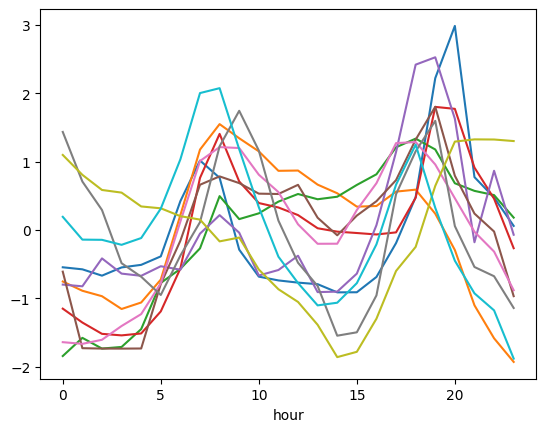

In [126]:
# plot the data for 10 random rows
plt.figure()
prices_tab.sample(10).T.plot(legend=False)
plt.show()

c:\Users\janle\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


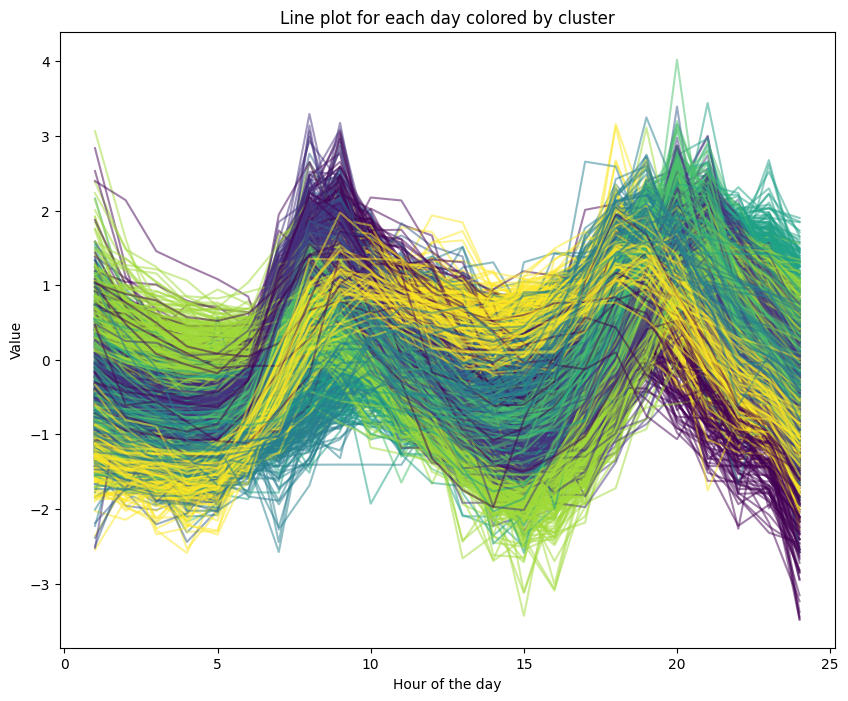

In [127]:
# Most of the explained variance is in the first and second component, so we can do a clustering only using PC1 and PC2
# Let's do a k-means clustering with a given number of cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(prices_df)
prices_df['cluster'] = kmeans.labels_

import matplotlib.pyplot as plt

# Assuming the columns representing hours are named as 'H1', 'H2', ..., 'H24'
hours = range(1, 25)

plt.figure(figsize=(10, 8))

# Plot a line for each day
for i in range(prices_df.shape[0]):
    plt.plot(hours, prices_df.iloc[i, :24], color=plt.cm.viridis(prices_df.iloc[i, -1]/7), alpha=0.5)

plt.xlabel('Hour of the day')
plt.ylabel('Value')
plt.title('Line plot for each day colored by cluster')
plt.show()

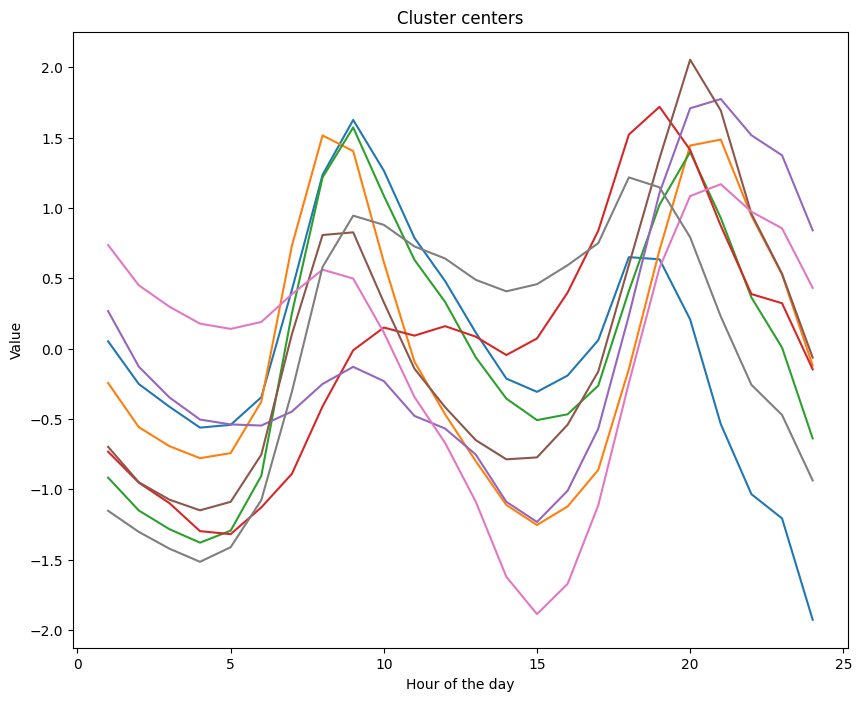

In [129]:
#plot kmeans.cluster_centers_
plt.figure(figsize=(10, 8))
plt.plot(hours, kmeans.cluster_centers_.T)
plt.xlabel('Hour of the day')
plt.ylabel('Value')
plt.title('Cluster centers')
plt.show()